# Background

According to a recent study published in the US News and World Report the cost of medical malpractice in the United States is $55.6 billion a year, which is 2.4 percent of annual health-care spending. Another 2011 study published in the New England Journal of Medicine revealed that annually, during the period 1991 to 2005, 7.4% of all physicians licensed in the US had a malpractice claim. These staggering numbers not only contribute to the high cost of health care, but the size of successful malpractice claims also contributes to high premiums for medical malpractice insurance.\
\
An insurance company wants to develop a better understanding of its claims paid out for medical malpractice lawsuits. Its records show claim payment amounts, as well as information about the presiding physician and the claimant for a number of recently adjudicated or settled lawsuits. 
\
\
![Image](https://storage.googleapis.com/kaggle-datasets-images/3779930/6538341/b3d156793ae1d03acb2731141c38f20d/dataset-cover.jpg)

# Data Collection & Prepraing

**Importing Dependencies**

In [2]:
#Pandas & Numpy
import pandas as pd 
import numpy as np

#Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

**Importing Data Collection**

In [3]:
#Loading the data from csv file to a Pandas DataFrame
dataset = pd.read_csv(r"C:\Users\Gigabyte\Desktop\medicalmalpractice.csv")

#Printing first 5 samples of data
print(dataset.head())

   Amount  Severity  Age  Private Attorney  Marital Status        Specialty  \
0   57041         7   62                 1               2  Family Practice   
1  324976         6   38                 1               2            OBGYN   
2  135383         4   34                 1               2       Cardiology   
3  829742         7   42                 1               1       Pediatrics   
4  197675         3   60                 0               2            OBGYN   

           Insurance  Gender  
0            Private    Male  
1       No Insurance  Female  
2            Unknown    Male  
3       No Insurance  Female  
4  Medicare/Medicaid  Female  


In [4]:
#Determining the number of rows and columns in dataset
num_rows,num_cols = dataset.shape
print(f"# of rows: {num_rows}")
print(f"# of columns: {num_cols}")

# of rows: 79210
# of columns: 8


In [5]:
#Getting informations about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79210 entries, 0 to 79209
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Amount            79210 non-null  int64 
 1   Severity          79210 non-null  int64 
 2   Age               79210 non-null  int64 
 3   Private Attorney  79210 non-null  int64 
 4   Marital Status    79210 non-null  int64 
 5   Specialty         79210 non-null  object
 6   Insurance         79210 non-null  object
 7   Gender            79210 non-null  object
dtypes: int64(5), object(3)
memory usage: 4.8+ MB


**Checking if there are NaN or Null**

In [6]:
#Checking for NaN values
dataset.isna().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

In [7]:
#Checking for Null values
dataset.isnull().sum()

Amount              0
Severity            0
Age                 0
Private Attorney    0
Marital Status      0
Specialty           0
Insurance           0
Gender              0
dtype: int64

**Replacing Private Attorney and Maritial Status values with Categorical Data**

In [8]:
#For Private Attorney Column
dataset['Private Attorney'].replace(0, 'Not Private', inplace=True)
dataset['Private Attorney'].replace(1, 'Private', inplace=True)

#For Matiral Status Column 
dataset['Marital Status'].replace(0, 'Divorced', inplace=True)
dataset['Marital Status'].replace(1, 'Single', inplace=True)
dataset['Marital Status'].replace(2, 'Married', inplace=True)
dataset['Marital Status'].replace(3, 'Widowed', inplace=True)
dataset['Marital Status'].replace(4, 'Unknown', inplace=True)

#Showing First 5 rows
dataset.head()

C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_6268\3003482383.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Private Attorney'].replace(0, 'Not Private', inplace=True)
C:\Users\Gigabyte\AppData\Local\Temp\ipykernel_6268\3003482383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
0,57041,7,62,Private,Married,Family Practice,Private,Male
1,324976,6,38,Private,Married,OBGYN,No Insurance,Female
2,135383,4,34,Private,Married,Cardiology,Unknown,Male
3,829742,7,42,Private,Single,Pediatrics,No Insurance,Female
4,197675,3,60,Not Private,Married,OBGYN,Medicare/Medicaid,Female


# Exploratory Data Analysis (EDA)

**Summary statistics for non-numerical values**

In [9]:
dataset.describe(include='all')

,Amount,Severity,Age,Private Attorney,Marital Status,Specialty,Insurance,Gender
count,79210.000000,79210.000000,79210.000000,79210,79210,79210,79210,79210
unique,NaN,NaN,NaN,2,5,20,5,2
top,NaN,NaN,NaN,Private,Married,Family Practice,Private,Female
freq,NaN,NaN,NaN,52349,41220,11436,34289,47770
mean,157484.554816,4.799659,42.701868,NaN,NaN,NaN,NaN,NaN
std,193135.093293,2.083439,19.811063,NaN,NaN,NaN,NaN,NaN
min,1576.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,43670.250000,3.000000,28.000000,NaN,NaN,NaN,NaN,NaN
50%,98131.000000,4.000000,43.000000,NaN,NaN,NaN,NaN,NaN
75%,154675.250000,7.000000,58.000000,NaN,NaN,NaN,NaN,NaN


**Correlation Matrix**

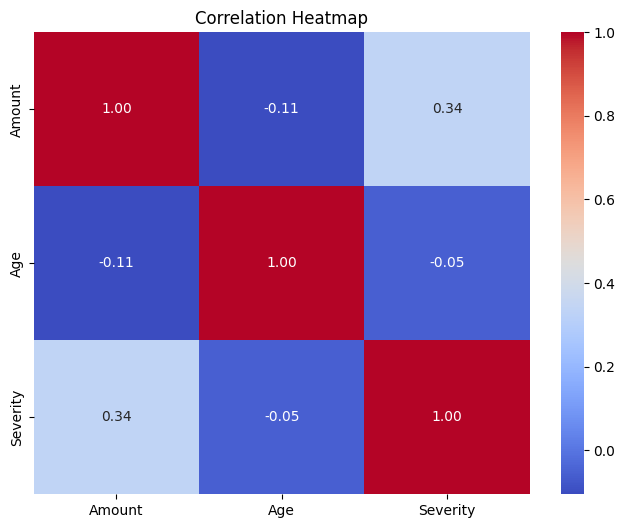

In [10]:

# Selecting only the numerical columns
numerical_data = dataset[['Amount', 'Age','Severity']]

# Calculating the correlation matrix
correlation_matrix = numerical_data.corr()

# Creating a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Histogram for Numeric Columns**

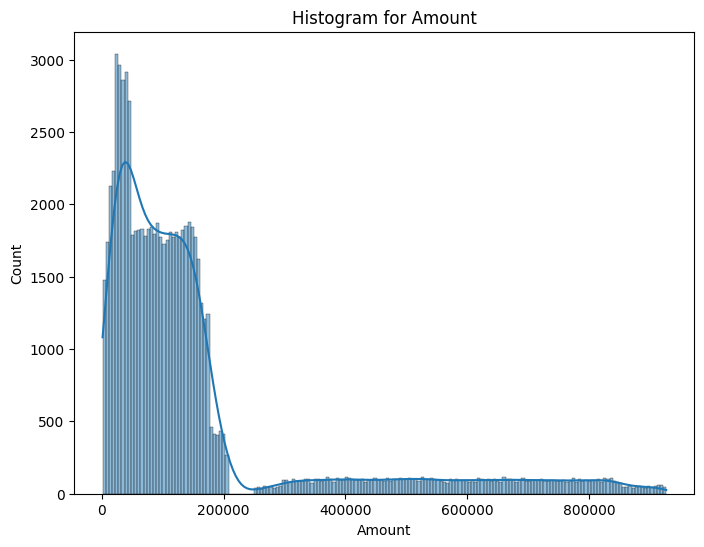

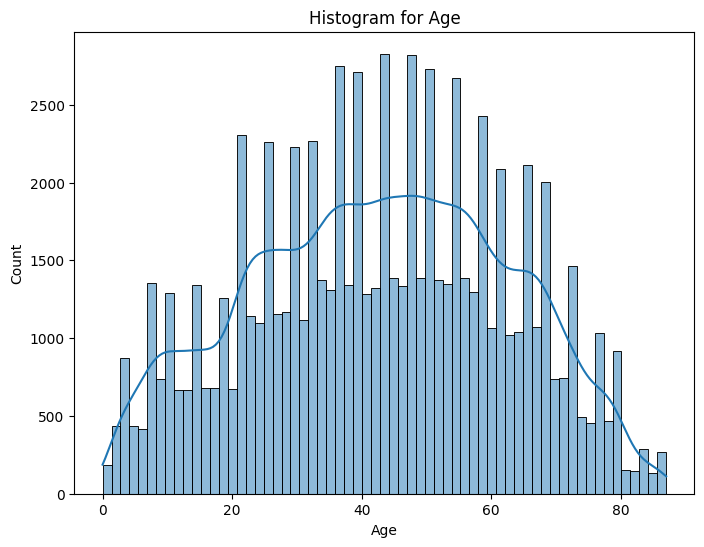

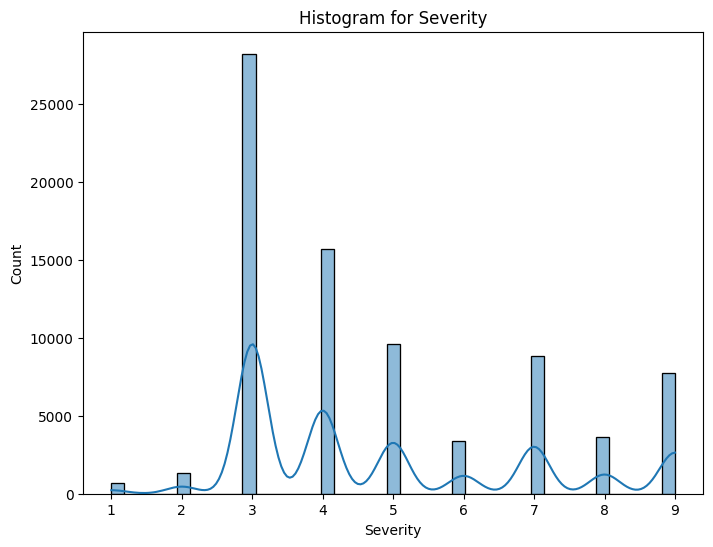

In [11]:
numeric_columns = ['Amount', 'Age','Severity']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=dataset, x=column, kde=True)
    plt.title(f'Histogram for {column}')
    plt.show()

**Box Plots for Numeric Columns**

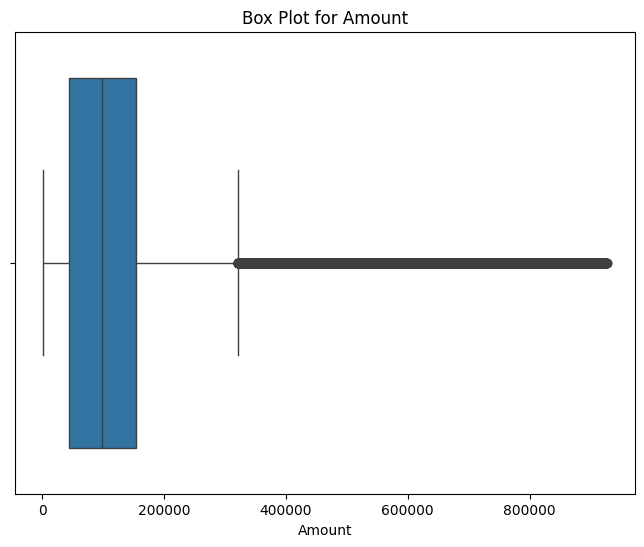

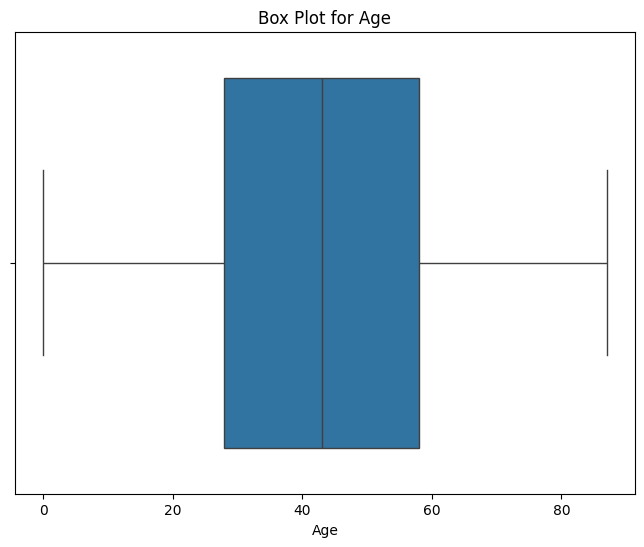

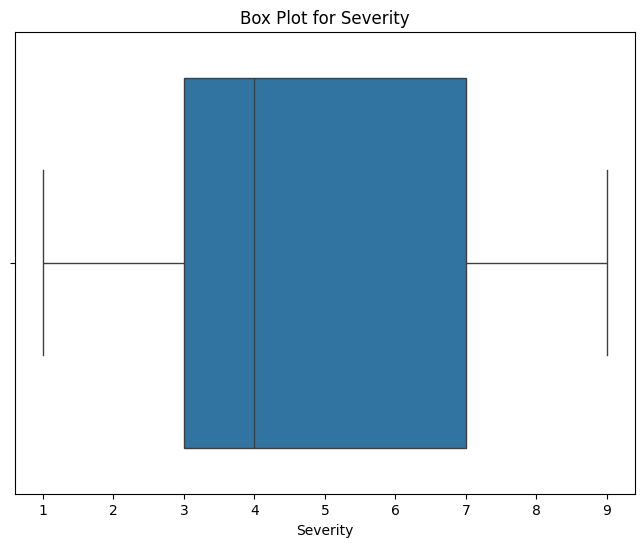

In [12]:
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=dataset, x=column)
    plt.title(f'Box Plot for {column}')
    plt.show()

**Distribution of Categorical Features**

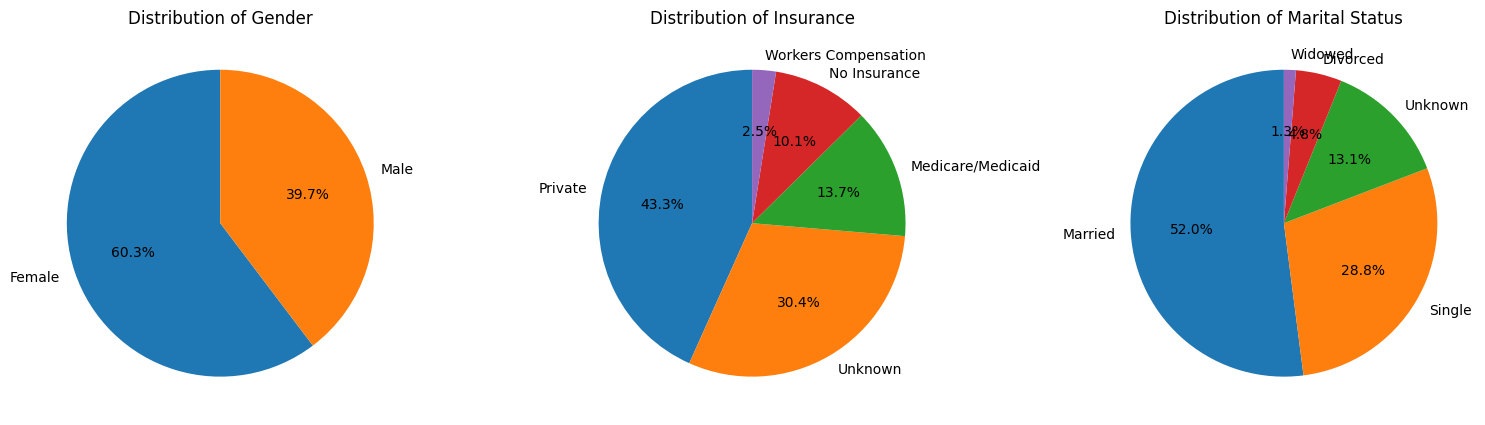

In [13]:
# Categorical columns to visualize
categorical_columns = ['Gender', 'Insurance', 'Marital Status']

# Creating subplots for the pie charts
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(15, 5))

for i, column in enumerate(categorical_columns):
    # Counting the frequency of each category
    category_counts = dataset[column].value_counts()
    
    # Creating a pie chart
    axes[i].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'Distribution of {column}')
    
# Adjusting the layout and show the pie charts
plt.tight_layout()
plt.show()


**Analyzing Severity Relationship with other Features**

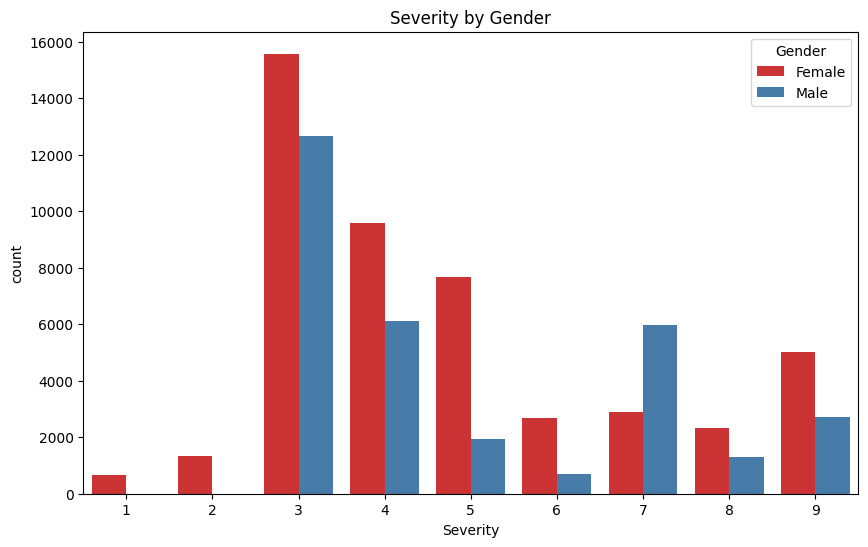

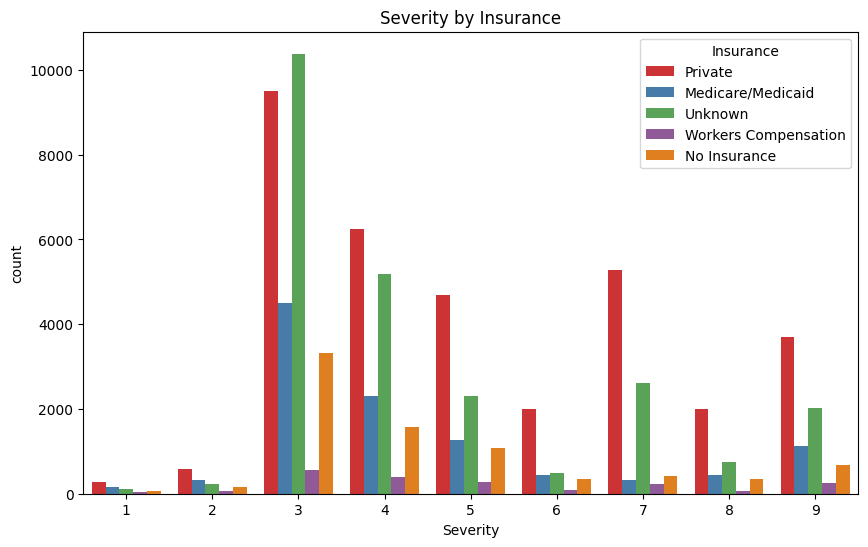

In [14]:
cat_features = ['Gender','Insurance']
for cat_feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=dataset, x='Severity', hue=cat_feature, palette='Set1')
    plt.title(f'Severity by {cat_feature}')
    plt.show()    





**Determining top 3 specialties with highest amounts**

In [15]:
# Group by 'Specialty' and calculate the sum of 'Amount' for each specialty
specialty_amount = dataset.groupby('Specialty')['Amount'].sum().reset_index()

# Sortomg the DataFrame in descending order based on 'Amount' and get the top 3 specialties
top_3_specialties = specialty_amount.sort_values(by='Amount', ascending=False).head(3)

# Displaying the top 3 specialties with the highest 'Amount'
print(top_3_specialties)

         Specialty      Amount
4  Family Practice  2438914425
8            OBGYN  1944511931
5  General Surgery  1246180749


**Relationship between Specialty & Severity**

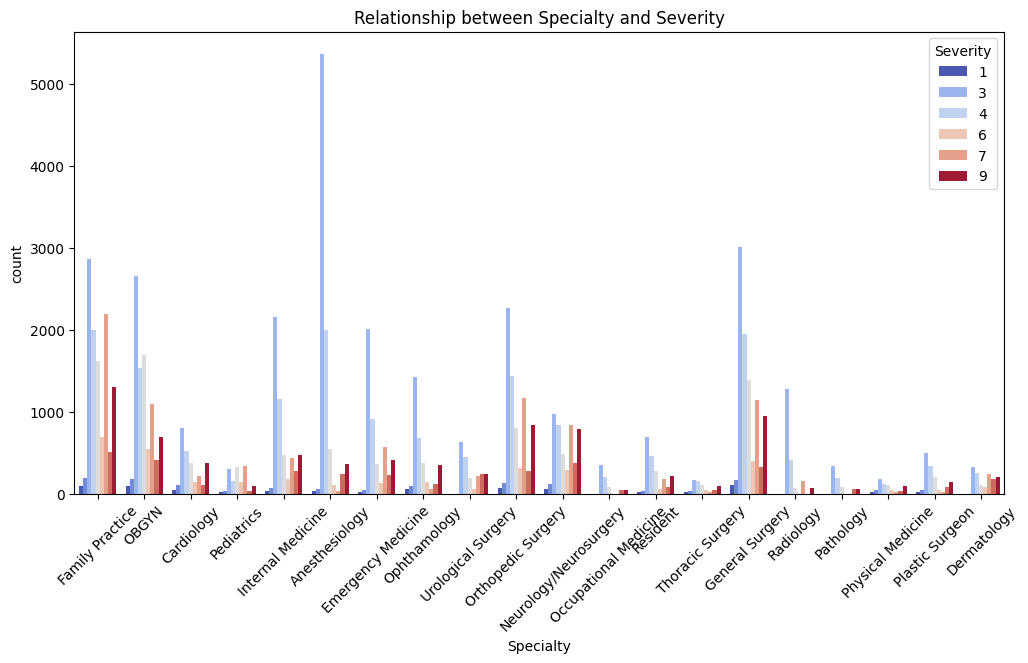

In [16]:
# Creating a count plot of 'Specialty' grouped by 'Severity'
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, x='Specialty', hue='Severity', palette='coolwarm')
plt.title('Relationship between Specialty and Severity')
plt.xticks(rotation=45)
plt.show()

**Conclusions**


•	The mean (average) payment is 157,484 dollars, while the median (middle) is 98,131 dollars.

•	The oldest patient in the data set is 87, the youngest a newborn. The average age is 42.7 and the median age is 43 years.

•	60.3% patients in this sample are female and 39.7% are male.

•	Patients with private insurance coverage are the largest group in this sample, although apparently the type of insurance held by many patients is unknown. Workers compensation patients    comprise the smallest group in this sample.

•	There does not seem to be a notable difference in the distribution of Amount for males and females.

•	Although there seems to be a difference in the distribution of Amount by Marital Status, the unbalanced data does not allow us to infer it is a correct conclusion.

•	The amount of the claim payment has a lot to do with whether a private attorney was used.

•	It doesn’t matter if someone was female or male, if a private attorney was used the payout was generally much higher.

•	Some specialties are relevant when considering the amount paid. However, we must analyze each case as we can see so many different amounts paid in each category.

•	Finally, the predictions are not linear, since we are dealing with many different cases and judicial decisions are subjective. Therefore, the exclusion of outliers was considered and executed in the model.
